In [31]:
from splitstep_CMDNLS import *

## Evolving the Data
Takes about one hour.
First second :

In [72]:
deltax = 10000
num = 2**18
x = np.linspace(-deltax,deltax,2**18)
dx = 2*deltax/(num - 1)
print("dx = "+str(dx))

dx = 0.07629423635191479


In [78]:
u_0 = one_soliton(0,x) + 1/(x + 5j)

T = 3.0
dt = 0.00005
u, t, xi = evolve(u_0, dx, T, dt, 200, 2)

Evolving this will use 1.25GB which is 7.75% of total available RAM and 8.99% of currently available RAM.
Evolving the gauge transformed data : 


  0%|          | 0/60000 [00:00<?, ?it/s]

## Animating the Simulation

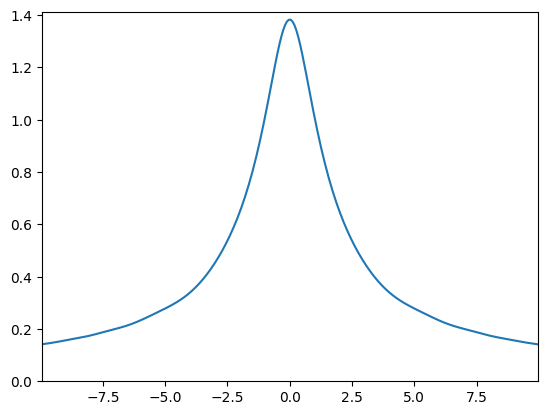

In [74]:
where = np.abs(x) < 10
anim = animate(np.abs(u[:,where]), t, x[where])
# anim.save("temp/matt_test_1.gif")
display(HTML(anim.to_jshtml()))

## Energy Test

  0%|          | 0/100 [00:00<?, ?it/s]

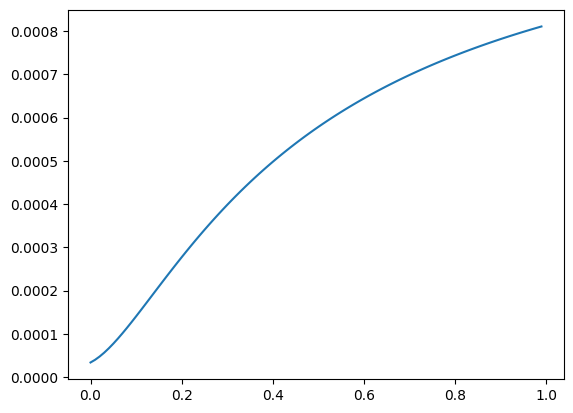

In [76]:
E = np.empty(len(t))
for i in tqdm(range(len(t))):
    E[i] = energy(u[i],dx,xi)
plt.plot(t_1,E)

## H_s norm test

  0%|          | 0/100 [00:00<?, ?it/s]

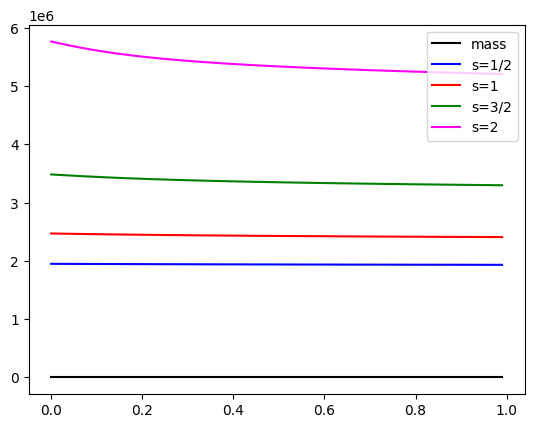

In [77]:
H = np.empty((5,len(t)))
for i in tqdm(range(len(t))):
    H[0,i] = mass(u[i],dx)
    for j in range(4):
         H[j+1,i] = H_s(u[i],(j+1)/2, dx,xi)
plt.plot(t,H[0],color='black',label="mass")
plt.plot(t,H[1],color='blue',label="s=1/2")
plt.plot(t,H[2],color='red',label="s=1")
plt.plot(t,H[3],color='green',label="s=3/2")
plt.plot(t,H[4],color='magenta',label="s=2")
plt.legend()
plt.show()

In [37]:
print(x)

[-10000.         -9999.4999875  -9998.999975  ...   9998.999975
   9999.4999875  10000.       ]


In [38]:
x_temp = np.arange(-deltax, deltax + dx, dx)
print(x_temp)

[-10000.          -9999.95        -9999.9        ...   9999.89999971
   9999.94999971   9999.99999971]


[-10000.          -9999.94999987  -9999.89999975 ...   9999.89999975
   9999.94999987  10000.        ]
[-10000.          -9999.95        -9999.9        ...   9999.84999971
   9999.89999971   9999.94999971]


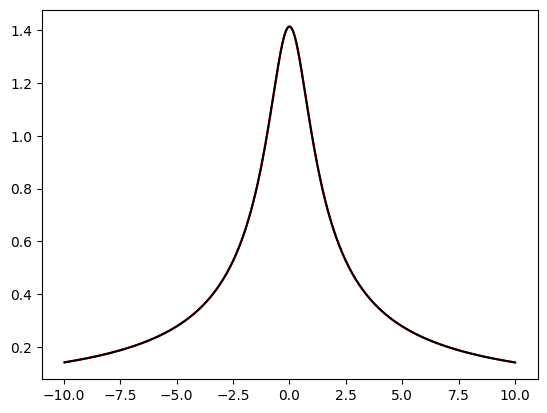

In [51]:
x = np.linspace(-10000, 10000, 400000)
y = np.arange(-10000,10000,0.05)
print(x)
print(y)
where_x = np.abs(x) < 10
where_y = np.abs(y) < 10
plt.plot(x[where_x],np.abs(one_soliton(0,x[where_x])),color='red')
plt.plot(y[where_y],np.abs(one_soliton(0,y[where_y])),color='black')
plt.show()